# Multicolinealidad

En este notebook, vamos a generar un conjunto de datos sintético que nos ayude a visualizar y entender este concepto, que puede resultar teórico.

## Importaciones

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Colinealidad

Para estudiar el efecto de la colinealidad en dos variables, vamos a hacer uso del conjunto de datos [Credit](https://www.kaggle.com/datasets/ishaanv/ISLR-Auto?select=Credit.csv). Este es un conjunto de datos sintético que contiene características de 400 usuarios. Para nuestro caso, nos van a servir las siguientes variables:

- `Balance`. Cantidad de dinero que el usuario tiene en el banco.

- `Age`. Edad de la persona, tratada con un entero numérico.

- `Limit`. Cantidad máxima de dinero que un banco está dispuesto a dejar a determinado usuario.

- [`Rating`](https://en.wikipedia.org/wiki/Credit_rating). Calificación que establece la capacidad del usuario para pagar su deuda y el riesgo que conlleva invertir en esta deuda.

Para este problema, vamos a estimar el balance de un usuario teniendo en cuenta la `Age` el `Limit` y el `Rating`.

In [2]:
datos = pd.read_csv("./datos/credit.csv")
print(datos)
datos = datos.loc[:, [item in ['Balance', 'Age', 'Limit', 'Rating'] for item in datos.columns]]

     Unnamed: 0   ID   Income  Limit  Rating  Cards  Age  Education  Gender   
0             1    1   14.891   3606     283      2   34         11    Male  \
1             2    2  106.025   6645     483      3   82         15  Female   
2             3    3  104.593   7075     514      4   71         11    Male   
3             4    4  148.924   9504     681      3   36         11  Female   
4             5    5   55.882   4897     357      2   68         16    Male   
..          ...  ...      ...    ...     ...    ...  ...        ...     ...   
395         396  396   12.096   4100     307      3   32         13    Male   
396         397  397   13.364   3838     296      5   65         17    Male   
397         398  398   57.872   4171     321      5   67         12  Female   
398         399  399   37.728   2525     192      1   44         13    Male   
399         400  400   18.701   5524     415      5   64          7  Female   

    Student Married         Ethnicity  Balance  
0 

In [3]:
modelo = sm.ols(formula = "Balance ~ Rating + Limit + Age * Limit", data = datos)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     306.3
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          1.32e-119
Time:                        15:58:10   Log-Likelihood:                -2737.1
No. Observations:                 400   AIC:                             5484.
Df Residuals:                     395   BIC:                             5504.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -418.2552     95.484     -4.380      0.000    -605.976    -230.534
Rating         2.3006      0.936      2.458      0.014       0.461       4.140
Limit          0.0528      0.065      0.814      0.416      -0.075       0.180
Age            0.3762      1.488      0.253      0.801      -2.549       3.301
Age:Limit     -0.0006      0.000     -2.046      0.041      -0.001   -2.18e-05
==============================================================================
Omnibus:                       19.800   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.052
Skew:                           0.334   Prob(JB):                     6.65e-08
Kurtosis:                       4.240   Cond. No.                     2.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
vif = pd.DataFrame()
subset = datos.loc[:,datos.columns != 'Balance']
vif['VIF'] = [variance_inflation_factor(exog=subset.values, exog_idx=i) for i in range(subset.shape[1])]
vif['variable'] = subset.columns
vif

VIF variable
0  540.136040    Limit
1  612.449343   Rating
2    7.377927      Age

Recordemos que lo que estamos haciendo es que explicamos cada una de las variables predictoras con las demás, obteniendo el $R^2$ y haciendo $\text{VIF}_j = \frac{1}{1-R^2_j}$. Si el valor de este está entre 1 y 5, lo debemos tener en la mira y si es mayor que 5, existe un problema claro de multicolinealidad. Podemos representar un diagrama de pares de variables para aclarar lo que está sucediendo.

Viendo el dataframe, nos podemos dar cuenta que `Limit` y `Rating` tienen mucha relación porque sus respectivos VIF son similares.

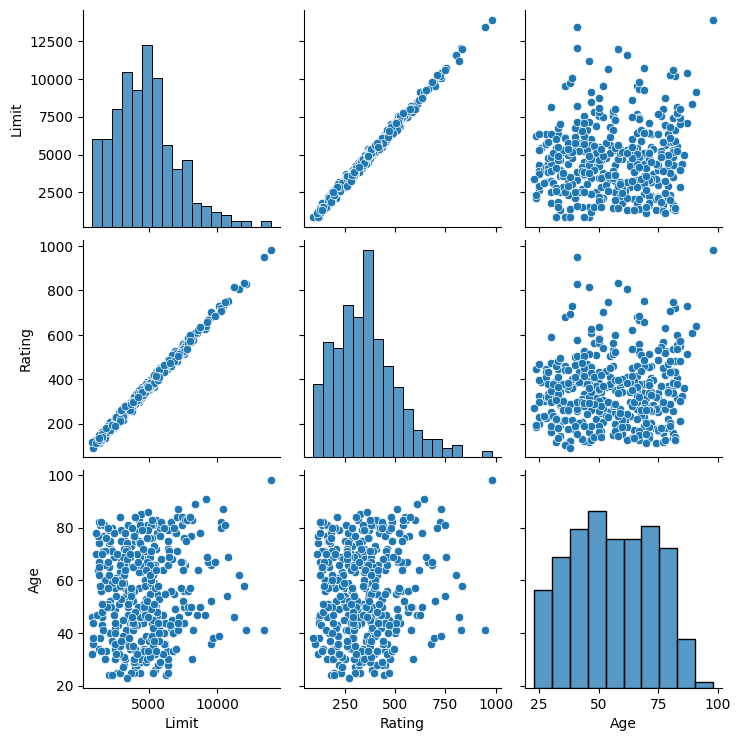

In [5]:
sns.pairplot(subset)
plt.show()

Tal y como esperábamos de manera numérica, `Rating` y `Limit` están fuertemente relacionados, por lo que podemos quitar uno de los dos sin miedo a eliminar información importante. Pero, ¿cuál? Observamos que en los p-valores de contraste de $\beta_i$, el de `Limit` es el más alto, por lo que vamos a eliminar este.

In [6]:
vif = pd.DataFrame()
subset = datos.loc[:,datos.columns != 'Balance']
subset = subset.loc[:,subset.columns != 'Limit']
vif['VIF'] = [variance_inflation_factor(subset.values, i) for i in range(subset.shape[1])]
vif['variable'] = subset.columns
vif

VIF variable
0  4.731519   Rating
1  4.731519      Age

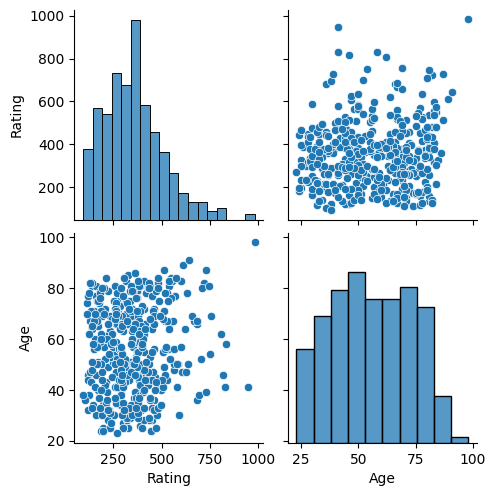

In [7]:
sns.pairplot(subset)
plt.show()

Al eliminar esa varaible, los VIF han bajado a un valor entre 1 y 5 (en el punto de mira) pero el diagrama de dispersión nos está indicando de que no existe demasiada relación, por lo que podemos hacer el modelo sin miedo a la multicolinealidad.

In [8]:
modelo = sm.ols(formula = "Balance ~ Rating + Age", data = datos)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     606.9
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          1.82e-121
Time:                        15:58:12   Log-Likelihood:                -2739.2
No. Observations:                 400   AIC:                             5484.
Df Residuals:                     397   BIC:                             5496.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -269.5811     44.806     -6.017      0.000    -357.668    -181.494
Rating         2.5933      0.074     34.840      0.000       2.447       2.740
Age           -2.3508      0.668     -3.521      0.000      -3.663      -1.038
==============================================================================
Omnibus:                       20.938   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.510
Skew:                           0.358   Prob(JB):                     3.21e-08
Kurtosis:                       4.249   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ahora que hemos eliminado este efecto, podemos observar que los estadísticos de ajuste $R^2$ y $R^2$ ajustado no han variado y el AIC y BIC ha disminuido un poco en cierta medida porque estamos usando un modelo más sencillo. Si nos fijamos en los valores de `Rating` antes y después de quitar `Ratings` nos daremos cuenta de algo interesante:


|-          |-       |coef   | std err| t    | P>t   |[0.025 | 0.975]|
|-          |-       |-      | -      | -    |-      |-      | -     |
|Con `Limit`|`Rating`|2.3105 | 0.940  |2.459 |0.014  |0.463  | 4.158 |
|Sin `Limit`|`Rating`|2.5933 | 0.074  |34.840|0.000  |2.447  |2.740  |

Como hemos visto en la teoría, la eliminación de `Limit` ha mantenido el valor del coeficiente `\beta` asociado pero ha provocado una disminución muy grande en cuanto al error estándar, lo que ha implicado una reducción muy grande del intervalo de confianza asociado.

## Multicolinealidad

Este efecto es muy similar a la colinealidad, solo que se produce con más de dos variables. Suele ser más complicado de detectar pero sobre todo de solucionar. Para ello, vamos a usar el conjunto de datos de deportistas que recordemos que tenía características de 202 deportistas. En este caso vamos a estimar la MCMagra en función de RecGR, Hematocrito, Ferritina, SumPliegues y Peso.

En este ejemplo veremos cómo se interrelacionan tres variables para formar este ejemplo de multicolinealidad.

In [9]:
datos = pd.read_csv("./datos/deportistas.csv", sep=";", decimal=',')
print(datos)
datos = datos.loc[:, [item in ['RecGR', 'Hematocrito', 'Ferritina', 'SumPliegues', 'MCMagra', 'Peso'] for item in datos.columns]]

     RecGR  RecGB  Hematocrito  Hemoglobina  Ferritina    IMC  SumPliegues   
0     3.96    7.5         37.5         12.3         60  20.56        109.1  \
1     4.41    8.3         38.2         12.7         68  20.67        102.8   
2     4.14    5.0         36.4         11.6         21  21.86        104.6   
3     4.11    5.3         37.3         12.6         69  21.88        126.4   
4     4.45    6.8         41.5         14.0         29  18.96         80.3   
..     ...    ...          ...          ...        ...    ...          ...   
197   4.90    7.6         45.6         16.0         90  27.56         67.2   
198   5.66    8.3         50.2         17.7         38  23.76         56.5   
199   5.03    6.4         42.7         14.3        122  22.01         47.6   
200   4.97    8.8         43.0         14.9        233  22.34         60.4   
201   5.38    6.3         46.0         15.7         32  21.07         34.9   

     PrctGrasa  MCMagra  Altura  Peso Deporte  Genero  
0      

In [10]:
modelo = sm.ols(formula = "MCMagra ~ RecGR + Hematocrito + Ferritina + SumPliegues + Peso", data = datos)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MCMagra   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     5749.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          1.89e-210
Time:                        15:58:12   Log-Likelihood:                -300.84
No. Observations:                 202   AIC:                             613.7
Df Residuals:                     196   BIC:                             633.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8182      1.148      4.196      0.000       2.554       7.083
RecGR           0.8050      0.442      1.821      0.070      -0.067       1.677
Hematocrito    -0.0721      0.058     -1.233      0.219      -0.187       0.043
Ferritina       0.0024      0.002      1.424      0.156      -0.001       0.006
SumPliegues    -0.1428      0.003    -48.749      0.000      -0.149      -0.137
Peso            0.9203      0.007    133.855      0.000       0.907       0.934
==============================================================================
Omnibus:                        1.630   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.305
Skew:                          -0.086   Prob(JB):                        0.521
Kurtosis:                       3.354   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
vif = pd.DataFrame()
subset = datos.loc[:,datos.columns != 'MCMagra']
vif['VIF'] = [variance_inflation_factor(exog=subset.values, exog_idx=i) for i in range(subset.shape[1])]
vif['variable'] = subset.columns
vif

VIF     variable
0  737.435148        RecGR
1  761.942725  Hematocrito
2    4.051005    Ferritina
3    5.489024  SumPliegues
4   44.777517         Peso

Del VIF anterior podemos observar que parece existir una relación entre `RecGR` y `Hematocrito` y además, el `Peso` parece tener también cierta relación con alguna de las dos antes mencionadas. Podemos representarlas a ver qué podemos observar.

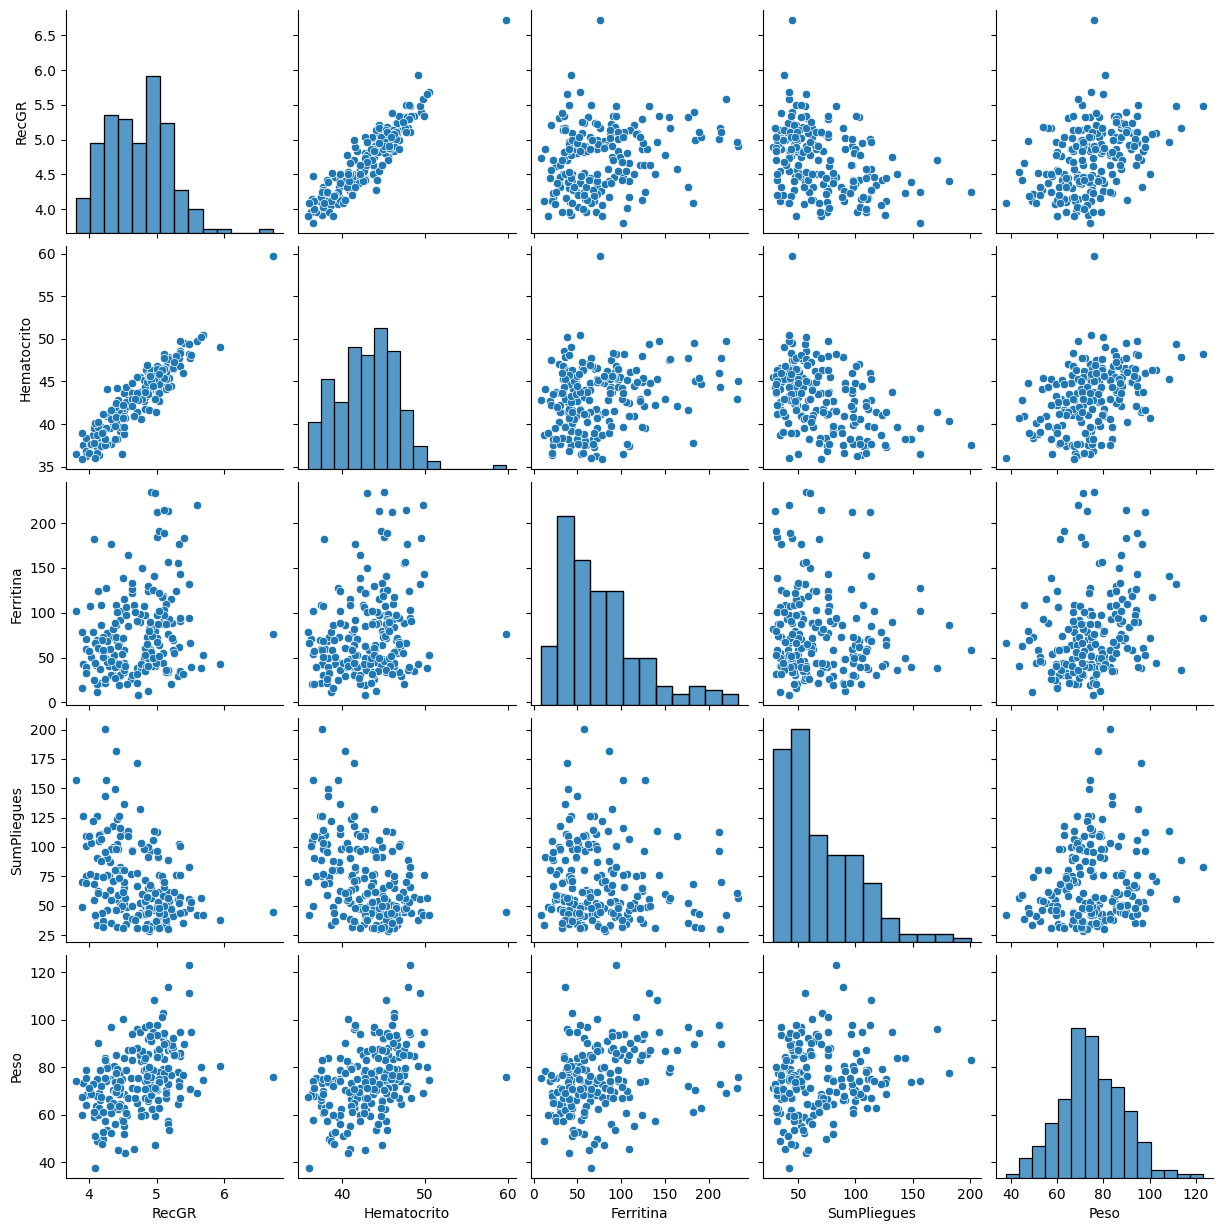

In [12]:
sns.pairplot(subset)
plt.show()

Dado que `Hematocrito` tiene más p-valor, será la que eliminaremos.

In [13]:
vif = pd.DataFrame()
subset = datos.loc[:,datos.columns != 'MCMagra']
subset = subset.loc[:,subset.columns != 'Hematocrito']
vif['VIF'] = [variance_inflation_factor(exog=subset.values, exog_idx=i) for i in range(subset.shape[1])]
vif['variable'] = subset.columns
vif

VIF     variable
0  35.940803        RecGR
1   4.050212    Ferritina
2   5.478880  SumPliegues
3  43.677496         Peso

In [14]:
modelo = sm.ols(formula = "MCMagra ~ RecGR + Ferritina + SumPliegues + Peso", data = datos)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MCMagra   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7167.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          4.47e-212
Time:                        15:58:15   Log-Likelihood:                -301.62
No. Observations:                 202   AIC:                             613.2
Df Residuals:                     197   BIC:                             629.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.0425      0.962      4.202      0.000       2.145       5.940
RecGR           0.3286      0.215      1.528      0.128      -0.096       0.753
Ferritina       0.0024      0.002      1.400      0.163      -0.001       0.006
SumPliegues    -0.1417      0.003    -50.602      0.000      -0.147      -0.136
Peso            0.9182      0.007    137.503      0.000       0.905       0.931
==============================================================================
Omnibus:                        2.124   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.765
Skew:                          -0.151   Prob(JB):                        0.414
Kurtosis:                       3.345   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observamos que siguen existiendo problemas de colinearidad por el vif, pero en el scatter plot vemos que la relación no es tan clara y además ha llegado el punto en el que el p-valor empieza a ser pequeño, por lo que no queda muy claro en si lo deberíamos sacar del estudio o no. 

In [15]:
vif = pd.DataFrame()
subset = datos.loc[:,datos.columns != 'MCMagra']
subset = subset.loc[:,subset.columns != 'Hematocrito']
subset = subset.loc[:,subset.columns != 'RecGR']
vif['VIF'] = [variance_inflation_factor(exog=subset.values, exog_idx=i) for i in range(subset.shape[1])]
vif['variable'] = subset.columns
vif

VIF     variable
0  4.010867    Ferritina
1  5.464820  SumPliegues
2  9.506886         Peso

In [16]:
modelo = sm.ols(formula = "MCMagra ~ Ferritina + SumPliegues + Peso", data = datos)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MCMagra   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     9492.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          1.35e-213
Time:                        15:58:15   Log-Likelihood:                -302.81
No. Observations:                 202   AIC:                             613.6
Df Residuals:                     198   BIC:                             626.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.3543      0.436     12.293      0.000       4.495       6.213
Ferritina       0.0026      0.002      1.542      0.125      -0.001       0.006
SumPliegues    -0.1438      0.002    -59.202      0.000      -0.149      -0.139
Peso            0.9232      0.006    157.199      0.000       0.912       0.935
==============================================================================
Omnibus:                        2.472   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.095
Skew:                          -0.183   Prob(JB):                        0.351
Kurtosis:                       3.339   Cond. No.                         750.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Al sacar la hemos provocado que el valor AIC suba. Al principio teníamos 613.7, con la eliminación de `Hematocrito` 613.2 y con la eliminación de `RecGR` 613.6. Es decir, que el valor ha aumentado en una unidad.

Eliminamos la `Ferritina` porque tiene más p-valor, y además nos está provocando un VIF que aún no es despreciable.

In [17]:
vif = pd.DataFrame()
subset = datos.loc[:,datos.columns != 'MCMagra']
subset = subset.loc[:,subset.columns != 'Hematocrito']
subset = subset.loc[:,subset.columns != 'RecGR']
subset = subset.loc[:,subset.columns != 'Ferritina']
vif['VIF'] = [variance_inflation_factor(exog=subset.values, exog_idx=i) for i in range(subset.shape[1])]
vif['variable'] = subset.columns
vif

VIF     variable
0  5.34574  SumPliegues
1  5.34574         Peso

In [18]:
modelo = sm.ols(formula = "MCMagra ~ SumPliegues + Peso", data = datos)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MCMagra   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.414e+04
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          3.27e-215
Time:                        15:58:15   Log-Likelihood:                -304.02
No. Observations:                 202   AIC:                             614.0
Df Residuals:                     199   BIC:                             624.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.3972      0.436     12.374      0.000       4.537       6.257
SumPliegues    -0.1444      0.002    -59.998      0.000      -0.149      -0.140
Peso            0.9258      0.006    164.463      0.000       0.915       0.937
==============================================================================
Omnibus:                        2.951   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.674
Skew:                          -0.178   Prob(JB):                        0.263
Kurtosis:                       3.437   Cond. No.                         594.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Al sacar la hemos provocado que el valor AIC suba. Al principio teníamos 613.7, con la eliminación de `Hematocrito` 613.2, con la eliminación de `RecGR` 613.6 y con la eliminación de `Ferritina` 614.0. El valor ha vuelto a aumentar en una unidad con respecto el principio del todo. Esto quiere decir que puede que no rente tanto quitar este predictor.